In [1]:
#pip install -q earthaccess

In [142]:
import geopandas as gpd
import earthaccess
import pandas as pd
from osgeo import gdal
import rasterio as rio
import xarray 
import rioxarray 
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage import io

In [74]:
# EarthAccess setup for HLS
# https://github.com/nasa/HLS-Data-Resources/blob/main/python/tutorials/HLS_Tutorial.ipynb

earthaccess.login(persist=True)

# Load River reach mask
I want to find HLS tiles which overlap with these locations. 

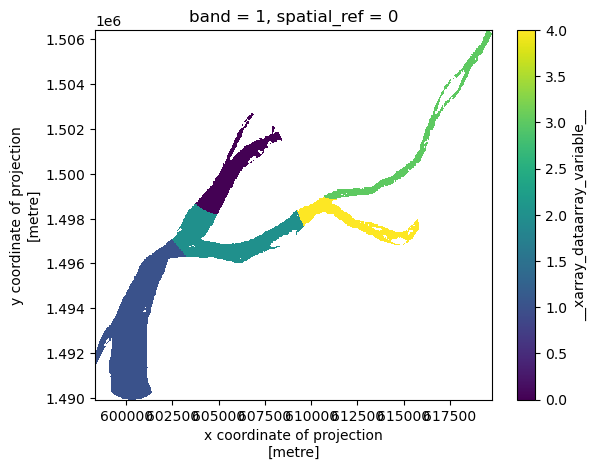

In [4]:
reach_mask = rioxarray.open_rasterio('data/external/river_reach_mask.nc', masked=True).squeeze()
reach_mask = reach_mask.rio.write_crs('EPSG:32648')
reach_mask.plot.imshow()

# Query earthaccess for some HLS data in Nov 20-30

In [5]:

# GDAL configurations used to successfully access LP DAAC Cloud Assets via vsicurl 
gdal.SetConfigOption('GDAL_HTTP_COOKIEFILE','~/cookies.txt')
gdal.SetConfigOption('GDAL_HTTP_COOKIEJAR', '~/cookies.txt')
gdal.SetConfigOption('GDAL_DISABLE_READDIR_ON_OPEN','EMPTY_DIR')
gdal.SetConfigOption('CPL_VSIL_CURL_ALLOWED_EXTENSIONS','TIF')
gdal.SetConfigOption('GDAL_HTTP_UNSAFESSL', 'YES')

In [6]:
# look for data over the sampling dates 
# (Nov 20, 21, 29, & 30, 2023)
temporal = ("2023-11-20T00:00:00", "2023-11-30T23:59:59")

In [7]:
#xds_lonlat = xds.rio.reproject("EPSG:4326")
bounds_proj = reach_mask.rio.bounds()
bounds_latlon = reach_mask.rio.reproject('EPSG:4326').rio.bounds()

In [8]:
results = earthaccess.search_data(
    short_name=['HLSL30','HLSS30'], 
    bounding_box=bounds_latlon,
    temporal=temporal,
    count=100
)
results_df = pd.json_normalize(results)
results_df.head(5)

Granules found: 23


,size,meta.concept-type,meta.concept-id,meta.revision-id,meta.native-id,meta.provider-id,meta.format,meta.revision-date,umm.TemporalExtent.RangeDateTime.BeginningDateTime,umm.TemporalExtent.RangeDateTime.EndingDateTime,...,umm.CollectionReference.EntryTitle,umm.RelatedUrls,umm.DataGranule.DayNightFlag,umm.DataGranule.Identifiers,umm.DataGranule.ProductionDateTime,umm.DataGranule.ArchiveAndDistributionInformation,umm.Platforms,umm.MetadataSpecification.URL,umm.MetadataSpecification.Name,umm.MetadataSpecification.Version
0,40.804092,granule,G2805825463-LPCLOUD,1,HLS.L30.T48PXA.2023325T031928.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T06:53:41.934Z,2023-11-21T03:19:28.281Z,2023-11-21T03:19:52.180Z,...,HLS Landsat Operational Land Imager Surface Re...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.L30.T48PXA.2023325T031928...,2023-11-23T06:51:42.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 42786...","[{'ShortName': 'LANDSAT-8', 'Instruments': [{'...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
1,171.964798,granule,G2805826666-LPCLOUD,1,HLS.L30.T48PWA.2023325T031928.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T06:56:55.887Z,2023-11-21T03:19:28.281Z,2023-11-21T03:19:52.180Z,...,HLS Landsat Operational Land Imager Surface Re...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.L30.T48PWA.2023325T031928...,2023-11-23T06:53:13.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 18031...","[{'ShortName': 'LANDSAT-8', 'Instruments': [{'...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
2,9.418929,granule,G2805817020-LPCLOUD,1,HLS.L30.T48PXV.2023325T031952.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T06:38:46.616Z,2023-11-21T03:19:52.180Z,2023-11-21T03:19:52.180Z,...,HLS Landsat Operational Land Imager Surface Re...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.L30.T48PXV.2023325T031952...,2023-11-23T06:36:47.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 98764...","[{'ShortName': 'LANDSAT-8', 'Instruments': [{'...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
3,165.176474,granule,G2805818626-LPCLOUD,1,HLS.L30.T48PWV.2023325T031952.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T06:40:55.807Z,2023-11-21T03:19:52.180Z,2023-11-21T03:19:52.180Z,...,HLS Landsat Operational Land Imager Surface Re...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.L30.T48PWV.2023325T031952...,2023-11-23T06:36:50.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 17320...","[{'ShortName': 'LANDSAT-8', 'Instruments': [{'...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5
4,210.919179,granule,G2805838792-LPCLOUD,1,HLS.S30.T48PXA.2023325T032029.v2.0,LPCLOUD,application/echo10+xml,2023-11-23T07:16:54.521Z,2023-11-21T03:34:10.537Z,2023-11-21T03:34:10.537Z,...,HLS Sentinel-2 Multi-spectral Instrument Surfa...,[{'URL': 'https://data.lpdaac.earthdatacloud.n...,Day,[{'Identifier': 'HLS.S30.T48PXA.2023325T032029...,2023-11-23T07:14:18.000Z,"[{'Name': 'Not provided', 'SizeInBytes': 22116...","[{'ShortName': 'Sentinel-2B', 'Instruments': [...",https://cdn.earthdata.nasa.gov/umm/granule/v1.6.5,UMM-G,1.6.5


There are four different sentinel images which 
overlap with these samples (annoyingly). 

Pull one of each and save a matching mask. This will make it
easy down the line to mask depending on which image we're looking at. 

In [11]:
img_names = ['PWV', 'PWA', 'PXV', 'PXA']

In [12]:
img_urls = []
for img_name in img_names: 
    idx = results_df.loc[results_df['meta.native-id'].str.contains(img_name)].index[0]
    urls = results[idx].data_links()
    for url in urls: 
        if 'B04' in url: 
            img_urls.append(url)
img_urls

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PWV.2023325T031952.v2.0/HLS.L30.T48PWV.2023325T031952.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PWA.2023325T031928.v2.0/HLS.L30.T48PWA.2023325T031928.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXV.2023325T031952.v2.0/HLS.L30.T48PXV.2023325T031952.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B04.tif']

For each image, save a version of the river mask matching the extent

In [13]:
for i, name in enumerate(img_names): 
    print(name)

PWV
PWA
PXV
PXA


In [14]:
# Use vsicurl to load the data directly into memory (be patient, may take a few seconds)
chunk_size = dict(band=1, x=512, y=512) # Tiles have 1 band and are divided into 512x512 pixel chunks
for i, name in enumerate(img_names):
    mask_fn = 'data/external/reach_mask_' + name + '.tif'
    if not os.path.exists(mask_fn):
        print(name)
        url = img_urls[i]
        print(url)
        # pull it 
        img = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
        # clip to extent of river mask
        img = img.rio.clip_box(*reach_mask.rio.bounds())
        # update reach mask to match 
        mask = reach_mask.rio.reproject_match(img)
        # save it
        mask.rio.to_raster(mask_fn)
    else: 
        print(f'{name} mask already created')
    

PWV mask already created
PWA mask already created
PXV mask already created
PXA mask already created


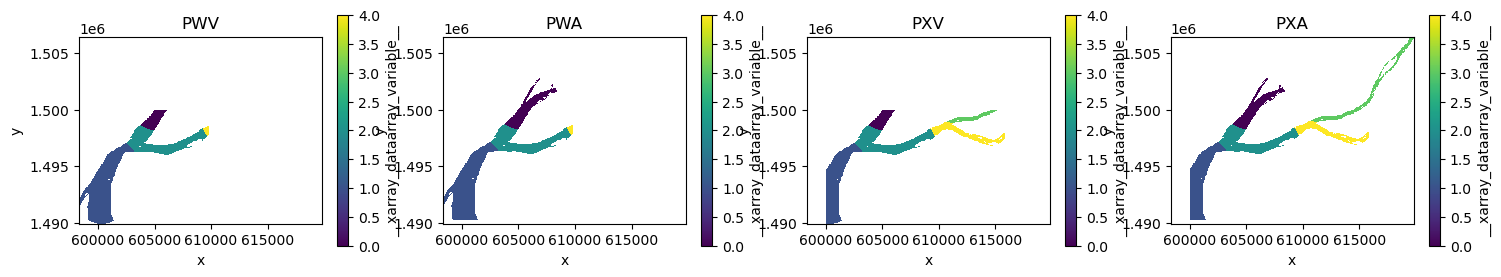

In [15]:
mask_pwv = rioxarray.open_rasterio('data/external/reach_mask_PWV.tif').squeeze()
mask_pwa = rioxarray.open_rasterio('data/external/reach_mask_PWA.tif').squeeze()
mask_pxv = rioxarray.open_rasterio('data/external/reach_mask_PXV.tif').squeeze()
mask_pxa = rioxarray.open_rasterio('data/external/reach_mask_PXA.tif').squeeze()

# plot Them
fig, ax = plt.subplots(1, 4, figsize=(18, 3))

mask_pwv.plot.imshow(ax=ax[0])
ax[0].set_title("PWV")

mask_pwa.plot.imshow(ax=ax[1])
ax[1].set_title("PWA")

mask_pxv.plot.imshow(ax=ax[2])
ax[2].set_title("PXV")

mask_pxa.plot.imshow(ax=ax[3])
ax[3].set_title("PXA")
        
for a in ax: 
    a.set_aspect('equal')
    a.set_xlim(bounds_proj[0], bounds_proj[2])
    a.set_ylim(bounds_proj[1], bounds_proj[3])

Pull QC band (Fmask), red (B04), green (B03), and NIR (B05)

# Pull the data

In [9]:
hls_results_urls = [granule.data_links() for granule in results]

In [115]:
h = hls_results_urls[0]  

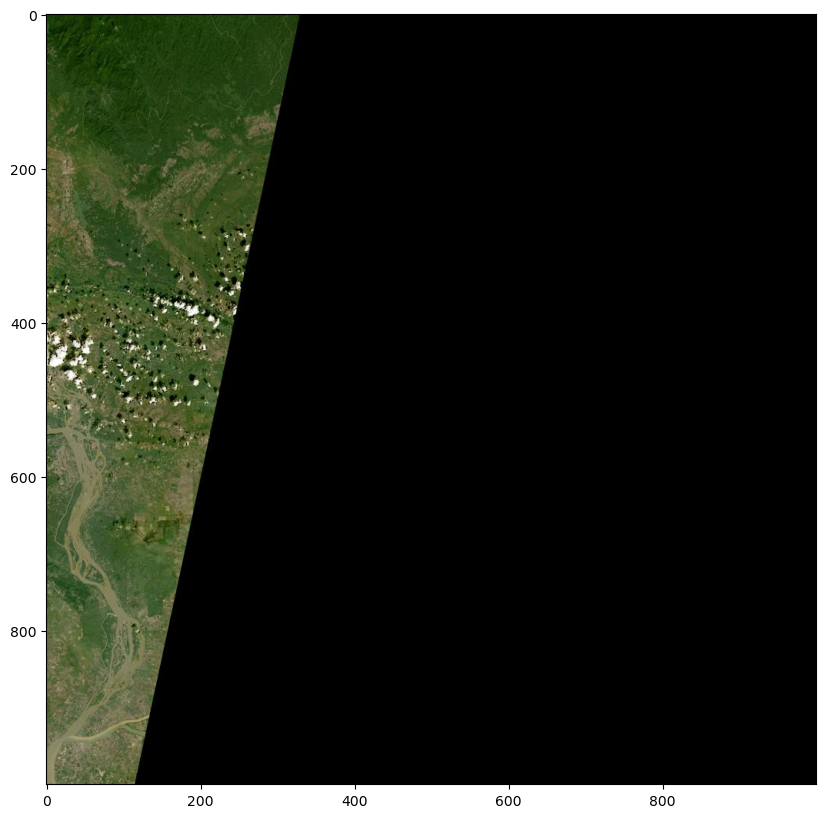

In [116]:
browse_urls = [granule.dataviz_links()[0] for granule in results] # 0 retrieves only the https links

image = io.imread(browse_urls[0])  # Load jpg browse image into memory

# Basic plot of the image
plt.figure(figsize=(10,10))              
plt.imshow(image)
plt.show()

In [117]:
# Pull fmask, red, green, NIR
# Fmask, B04, B03, B05
band_links = []

# Define which HLS product is being accessed
bands = ['Fmask', 'B04', 'B03', 'B05'] 


In [118]:
# Subset the assets in the item down to only the desired bands
for url in h: 
    if any(b in url for b in bands):
        band_links.append(url)
band_links

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B03.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.Fmask.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B04.tif',
 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B05.tif']

In [119]:

# Use vsicurl to load the data directly into memory (be patient, may take a few seconds)
chunk_size = dict(band=1, x=512, y=512) # Tiles have 1 band and are divided into 512x512 pixel chunks
# Sometimes a vsi curl error occurs so we need to retry if it does
max_retries = 1
for url in band_links:
    print(url)
    # Try Loop
    for _i in range(max_retries):
        try:
            # Open and build datasets
            if url.rsplit('.', 2)[-2] == bands[0]:      # Fmask index
                fmask = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
            elif url.rsplit('.', 2)[-2] == bands[1]:    # Red index
                red = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                red.attrs['scale_factor'] = 0.0001        # hard coded the scale_factor attribute
            elif url.rsplit('.', 2)[-2] == bands[2]:    # Green index
                green = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                green.attrs['scale_factor'] = 0.0001       # hard coded the scale_factor attribute
            elif url.rsplit('.', 2)[-2] == bands[3]:    # NIR index
                nir = rioxarray.open_rasterio(url, chunks=chunk_size, masked=True).squeeze('band', drop=True)
                nir.attrs['scale_factor'] = 0.0001       # hard coded the scale_factor attribute
            break # Break out of the retry loop
        except Exception as ex:
            print(f"vsi curl error: {ex}. Retrying...")
    else:
        print(f"Failed to process {url} after {max_retries} retries. Please check to see you're authenticated with earthaccess.")
print("The COGs have been loaded into memory!")

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B03.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.Fmask.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B04.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T48PXA.2023325T031928.v2.0/HLS.L30.T48PXA.2023325T031928.v2.0.B05.tif
The COGs have been loaded into memory!


# Turn it into xarray dataset
One band per dataarray? 


In [120]:
hls_ds = fmask.to_dataset(name='fmask')
hls_ds['red'] = red
hls_ds['green'] = green
hls_ds['nir'] = nir

## Filter to only one reach

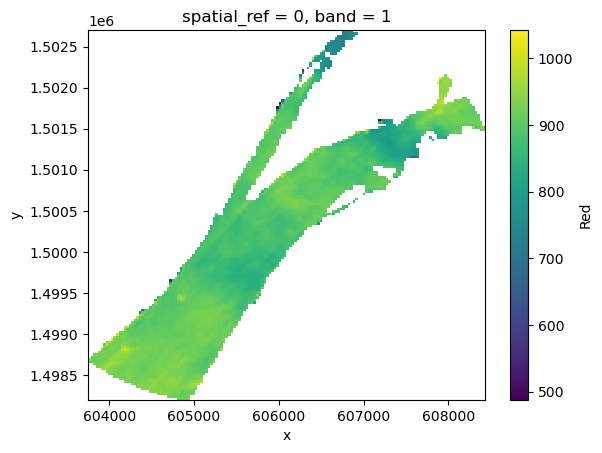

In [121]:
reach_0 = hls_ds.where(mask_pxa == 0, drop=True)
reach_0['red'].plot.imshow()

# Remove clouds, and any pixels which do not pass QC
Also record percentage of pixels which did pass QC


* Bit 0: Cirrus
    * 0: Reserved but not used
    * 1: Reserved but not used
* Bit 1: Cloud
    * 0: No
    * 1: Yes
* Bit 2: Adjacent to cloud/shadow
    * 0: No
    * 1: Yes
* Bit 3: Cloud shadow
    * 0: No
    * 1: Yes
* Bit 4: Snow/ice
    * 0: No
    * 1: Yes
* Bit 5: Water
    * 0: No
    * 1: Yes
* Bits 6-7: Aerosol level
    * 0: Climatology aerosol
    * 1: Low aerosol
    * 2: Moderate aerosol
    * 3: High aerosol


In [122]:
# NDTI
def ndti(dataset): 
    ndti = (dataset['red'] - dataset['green']) / (dataset['red'] + dataset['green'])
    return(ndti)

def get_qc_bit(ar, bit):
    return ( (ar // (2**bit)) - ( (ar // (2**bit)) // 2 * 2) )

'00000100'

In [130]:
# Mask clouds
reach_0['red'].count().values

5090

In [148]:
reach_0_qa.attrs['failed_count']


{}

692


-0.0058479533

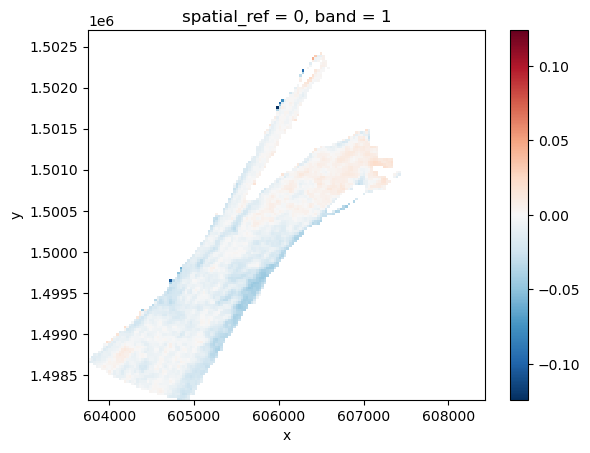

In [149]:
# Not cloud
cloud_mask = (
    (get_qc_bit(reach_0['fmask'], 1) == 0) & # not cloud
    (get_qc_bit(reach_0['fmask'], 2) == 0) & # not cloud adjacent
    (get_qc_bit(reach_0['fmask'], 3) == 0)   # not cloud shadow
)

reach_0_qa = reach_0.where(cloud_mask)
reach_0_failed_count = reach_0['red'].count().values - reach_0_qa['red'].count().values
reach_0_qa.attrs['failed_pixel_count'] = reach_0_failed_count
reach_0_qa.attrs['total_pixel_count'] = reach_0['red'].count().values
print(reach_0_failed_count)

ndti(reach_0.where(cloud_mask)).plot.imshow()
np.nanmedian(ndti(reach_0.where(cloud_mask)).values)

# Calculate NDTI and NDVI for remaining pixels